Import library

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import AdamW

Download dataset

In [43]:
from google.colab import drive

# Download the file using gdown
!gdown https://drive.google.com/uc?id=1E2PanMzF2oOlBbpLY1PCR4HQYVoeQ4PT # location file gdrive
print('Data source downloaded successfully.')

Downloading...
From: https://drive.google.com/uc?id=1E2PanMzF2oOlBbpLY1PCR4HQYVoeQ4PT
To: /content/weather.csv
100% 1.79M/1.79M [00:00<00:00, 106MB/s]
Data source downloaded successfully.


Load dataset

In [44]:
weather_df = pd.read_csv("weather.csv")

Filter for Birmingham

In [45]:
city = "Birmingham"
city_df = weather_df[weather_df["Station.City"] == city].copy()

Convert to datetime and sort

In [46]:
city_df["Date.Full"] = pd.to_datetime(city_df["Date.Full"])
city_df = city_df.sort_values("Date.Full", kind='quicksort')

Show the data

In [47]:
city_df.head()

,Data.Precipitation,Date.Full,Date.Month,Date.Week of,Date.Year,Station.City,Station.Code,Station.Location,Station.State,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed
0,0.00,2016-01-03,1,3,2016,Birmingham,BHM,"Birmingham, AL",Alabama,39,46,32,33,4.33
315,0.52,2016-01-10,1,10,2016,Birmingham,BHM,"Birmingham, AL",Alabama,44,52,36,12,6.55
630,0.34,2016-01-17,1,17,2016,Birmingham,BHM,"Birmingham, AL",Alabama,42,52,31,28,3.94
945,1.55,2016-01-24,1,24,2016,Birmingham,BHM,"Birmingham, AL",Alabama,36,45,27,21,6.01
1260,0.87,2016-01-31,1,31,2016,Birmingham,BHM,"Birmingham, AL",Alabama,49,60,37,26,5.60


Normalize average temperature

In [48]:
scaler = MinMaxScaler()
city_df["ScaledTemp"] = scaler.fit_transform(city_df[["Data.Temperature.Avg Temp"]])

In [49]:
city_df["ScaledTemp"].head()

,ScaledTemp
0,0.06
315,0.16
630,0.12
945,0.00
1260,0.26


Create sequence

In [50]:
sequence_length = 4
X, y = [], []
temps = city_df["ScaledTemp"].values

for i in range(len(temps) - sequence_length):
    X.append(temps[i:i + sequence_length])
    y.append(temps[i + sequence_length])

X = np.array(X)
y = np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))

Split train/test

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

Build RNN model

In [52]:
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(sequence_length, 1)),
    Dense(1)
])
model.compile(optimizer=AdamW(learning_rate=0.001), loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Train model

In [53]:
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 616ms/step - loss: 0.3976 - val_loss: 0.1368
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.2952 - val_loss: 0.0841
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - loss: 0.2078 - val_loss: 0.0442
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - loss: 0.1331 - val_loss: 0.0202
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0722 - val_loss: 0.0137
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0331 - val_loss: 0.0227
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0119 - val_loss: 0.0455
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0075 - val_loss: 0.0753
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0134 - val_loss: 0.1029
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0252 - val_loss: 0.1186
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0325 - val_loss: 0.1147
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0312 - val_loss: 0.09

Predict

In [54]:
predictions = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Inverse scale predictions and actual values

In [55]:
y_pred = scaler.inverse_transform(predictions)
y_true = scaler.inverse_transform(y_test.reshape(-1, 1))

Evaluate using regression metrics

In [56]:
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print("\nEvaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Evaluation Metrics:
Mean Squared Error (MSE): 92.04
Mean Absolute Error (MAE): 8.13
Root Mean Squared Error (RMSE): 9.59
R² Score: 0.2640


Plot actual vs predicted

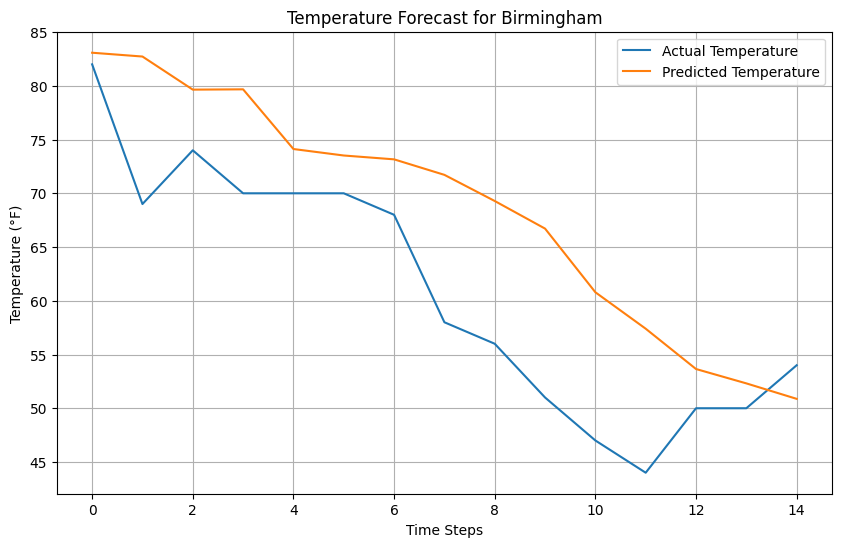

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(y_true, label='Actual Temperature')
plt.plot(y_pred, label='Predicted Temperature')
plt.title(f"Temperature Forecast for {city}")
plt.xlabel("Time Steps")
plt.ylabel("Temperature (°F)")
plt.legend()
plt.grid(True)
plt.show()

Get the last 4 known scaled values from the dataset

In [72]:
last_4_weeks = city_df[["Date.Full", "Data.Temperature.Avg Temp"]].tail(4).reset_index(drop=True)

Predict next 2 weeks

In [73]:
# Get the last 4 actual scaled temps
last_sequence = temps[-sequence_length:].tolist()
sequence_input = np.array(last_sequence).reshape(1, sequence_length, 1)

# Predict next week's temperature
next_week_scaled = model.predict(sequence_input)
next_week_temp = scaler.inverse_transform(next_week_scaled)[0][0]

# Append predicted temp, shift sequence, predict 2nd week
next_input = last_sequence[1:] + [next_week_scaled[0][0]]
next_input_array = np.array(next_input).reshape(1, sequence_length, 1)

# Predict 2 weeks ahead
week_after_scaled = model.predict(next_input_array)
week_after_temp = scaler.inverse_transform(week_after_scaled)[0][0]

# Get the current week's temperature (last actual temp)
current_temp = scaler.inverse_transform([[last_sequence[-1]]])[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Prediction

In [74]:
print("\nLast 4 Weeks of Average Temperatures:")
for i, row in last_4_weeks.iterrows():
    print(f"Week {i+1}: {row['Date.Full'].date()} - {row['Data.Temperature.Avg Temp']:.2f} °F")
print(f"\nCurrent week's actual temperature: {current_temp:.2f} °F")
print(f"Predicted temperature for next week: {next_week_temp:.2f} °F")
print(f"Predicted temperature for week after next: {week_after_temp:.2f} °F")


Last 4 Weeks of Average Temperatures:
Week 1: 2016-12-11 - 44.00 °F
Week 2: 2016-12-18 - 50.00 °F
Week 3: 2016-12-25 - 50.00 °F
Week 4: 2017-01-01 - 54.00 °F

Current week's actual temperature: 54.00 °F
Predicted temperature for next week: 54.49 °F
Predicted temperature for week after next: 55.62 °F
